# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
data_range = [np.min(all_x), np.max(all_x)]
x1_test.shape, x2_test.shape

((1, 100), (1, 200))

In [3]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)
train_x, test_x

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   8.,
          62., 133., 128.,  61.,   6.,   1.,   0.,   0.],
        [  1.,   3.,   3.,   9.,  13.,  45.,  57.,  71.,  98.,  98.,  99.,
         104.,  77.,  54.,  30.,  17.,  14.,   4.,   3.]]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 12., 30.,
         43., 12.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  3., 10.,  7.,  9., 25., 24., 30., 24., 29.,  9.,
         10., 13.,  3.,  3.,  1.,  0.]]))

## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

[400. 800.]


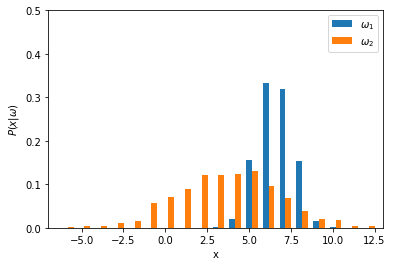

(2, 19)

In [4]:
from likelihood import likelihood

l = likelihood(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()

test_x.shape

In [5]:
#TODO
#compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
error_num = 0
C, N = test_x.shape
for i in range(0, N):
    if l[0, i] > l[1, i]:
        error_num = error_num + test_x[1, i]
    else:
        error_num = error_num + test_x[0, i]

error_rate = error_num / test_x.sum()
print("the number of misclassified test samples: %d"%error_num)
print("the test error: %lf"%error_rate)
# end answer


the number of misclassified test samples: 64
the test error: 0.213333


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

[400. 800.]
[400. 800.]
[0.33333333 0.66666667]


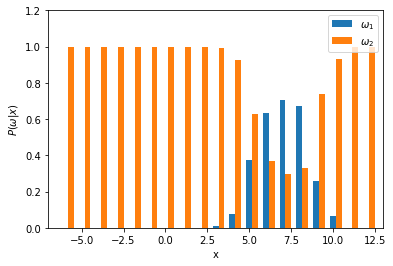

In [7]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

In [12]:
#TODO
#compute the number of all the misclassified x using optimal bayes decision rule

# begin answer
error_num = 0
C, N = test_x.shape
for i in range(0, N):
    if p[0, i] > p[1, i]:
        error_num = error_num + test_x[1, i]
    elif p[0, i] < p[1, i]:
        error_num = error_num + test_x[0, i]
    else: 
        if l[0, i] > l[1, i]:
            error_num = error_num + test_x[1, i]
        else:
            error_num = error_num + test_x[0, i]
        
error_rate = error_num / test_x.sum()
print("the number of misclassified test samples: %d"%error_num)
print("the test error: %lf"%error_rate)
# end answer


the number of misclassified test samples: 47
the test error: 0.156667


## Part 3 risk


In [20]:
risk = np.array([[0, 1], [2, 0]])
#TODO
#get the minimal risk using optimal bayes decision rule and risk weights
Risk = 0
C, N=p.shape
for t in range(0, N):
    min_value=99999;
    for i in range(0, C):
        temp_risk = 0;
        for j in range(0, C):
            temp_risk= temp_risk + risk[i, j] * p[j, t];
        min_value = min(temp_risk, min_value)
    Risk = Risk + min_value
print("the minimal total risk: %lf"%Risk)
# begin answer
# end answer

the minimal total risk: 2.444354
